In [31]:
# تحميل المكتبات
import pandas as pd
import re
import warnings
warnings.filterwarnings("ignore")
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:

# تحميل البيانات
df = pd.read_csv(r"E:\ANU Material\Semester 4\DS Tools & Software\Emotion_classify_Data.csv")
# file_path="./Emotion_classify_Data.csv"
# df= pd.read_csv(file_path)



In [3]:

# Display the first few rows of the dataset
df.head()

,Comment,Emotion
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy
4,i feel suspicious if there is no one outside l...,fear


In [28]:
# استكشاف البيانات
print("\n=== Missing Values ===")
print(df.isnull().sum())
print("\n=== Emotion Distribution ===")
print(df['Emotion'].value_counts())




=== Missing Values ===
Comment          0
Emotion          0
clean_content    0
dtype: int64

=== Emotion Distribution ===
Emotion
anger    2000
joy      2000
fear     1937
Name: count, dtype: int64


In [5]:
nltk.download('punkt_tab')

# تنزيل الموارد المطلوبة
nltk.download('stopwords')
nltk.download('punkt')

# تنظيف البيانات
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def clean_text(text):
    text = re.sub(r'http\S+|www\S+', '', text)       # إزالة الروابط
    text = re.sub(r'[^A-Za-z0-9]+', ' ', text)       # إزالة الرموز غير الأبجدية الرقمية
    text = text.lower()                             # تحويل النص إلى أحرف صغيرة
    words = word_tokenize(text)
    words = [stemmer.stem(word) for word in words if word not in stop_words]   # إزالة كلمات التوقف واستخدام Stemming
    return " ".join(words)

# Assuming df is already defined and contains a 'Comment' column
df['clean_content'] = df['Comment'].apply(clean_text)

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# تحويل النصوص إلى تمثيل رقمي باستخدام TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['clean_content']).toarray()

In [ ]:
# تحويل التصنيفات إلى قيم رقمية
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Emotion'])

In [8]:
# تقسيم البيانات إلى تدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [9]:
# تدريب نموذج Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)



MultinomialNB()

In [10]:
# التنبؤ باستخدام Naive Bayes
y_pred_nb = nb_model.predict(X_test)


In [11]:

# تدريب نموذج Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [12]:

# التنبؤ باستخدام Logistic Regression
y_pred_lr = lr_model.predict(X_test)



In [29]:
# تدريب نموذج Support Vector Machines
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(X_train, y_train)

# التنبؤ باستخدام Support Vector Machines
y_pred_svm = svm_model.predict(X_test)

In [14]:
# حساب المقاييس لكل من النماذج
accuracy_nb = accuracy_score(y_test, y_pred_nb)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

f1_nb = f1_score(y_test, y_pred_nb, average='weighted')
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')

In [15]:
# عرض نتائج التصنيف
print("Naive Bayes - Accuracy: {:.2f}%".format(accuracy_nb * 100))
print("Naive Bayes - F1 Score: {:.2f}%".format(f1_nb * 100))
print("\nLogistic Regression - Accuracy: {:.2f}%".format(accuracy_lr * 100))
print("Logistic Regression - F1 Score: {:.2f}%".format(f1_lr * 100))
print("\nSupport Vector Machines - Accuracy: {:.2f}%".format(accuracy_svm * 100))
print("Support Vector Machines - F1 Score: {:.2f}%".format(f1_svm * 100))

# تحويل classification_report إلى نسب مئوية
def classification_report_to_percentages(report):
    lines = report.split('\n')
    new_lines = []
    for line in lines:
        if line.strip() == '':
            new_lines.append(line)
            continue
        parts = line.split()
        if len(parts) < 2 or parts[0] in ['accuracy', 'macro', 'weighted']:
            new_lines.append(line)
            continue
        new_line = parts[0]
        for part in parts[1:]:
            try:
                value = float(part)
                new_line += '   {:.2f}%'.format(value * 100)
            except ValueError:
                new_line += '  ' + part
        new_lines.append(new_line)
    return '\n'.join(new_lines)

print("\nNaive Bayes - Classification Report:\n", classification_report_to_percentages(classification_report(y_test, y_pred_nb)))
print("\nLogistic Regression - Classification Report:\n", classification_report_to_percentages(classification_report(y_test, y_pred_lr)))
print("\nSupport Vector Machines - Classification Report:\n", classification_report_to_percentages(classification_report(y_test, y_pred_svm)))

Naive Bayes - Accuracy: 90.40%
Naive Bayes - F1 Score: 90.40%

Logistic Regression - Accuracy: 92.51%
Logistic Regression - F1 Score: 92.50%

Support Vector Machines - Accuracy: 91.75%
Support Vector Machines - F1 Score: 91.76%

Naive Bayes - Classification Report:
 precision  recall  f1-score  support

0   88.00%   93.00%   90.00%   39200.00%
1   92.00%   88.00%   90.00%   41600.00%
2   91.00%   90.00%   91.00%   38000.00%

    accuracy                           0.90      1188
   macro avg       0.90      0.90      0.90      1188
weighted avg       0.90      0.90      0.90      1188


Logistic Regression - Classification Report:
 precision  recall  f1-score  support

0   92.00%   93.00%   93.00%   39200.00%
1   94.00%   90.00%   92.00%   41600.00%
2   91.00%   95.00%   93.00%   38000.00%

    accuracy                           0.93      1188
   macro avg       0.93      0.93      0.93      1188
weighted avg       0.93      0.93      0.93      1188


Support Vector Machines - Classific

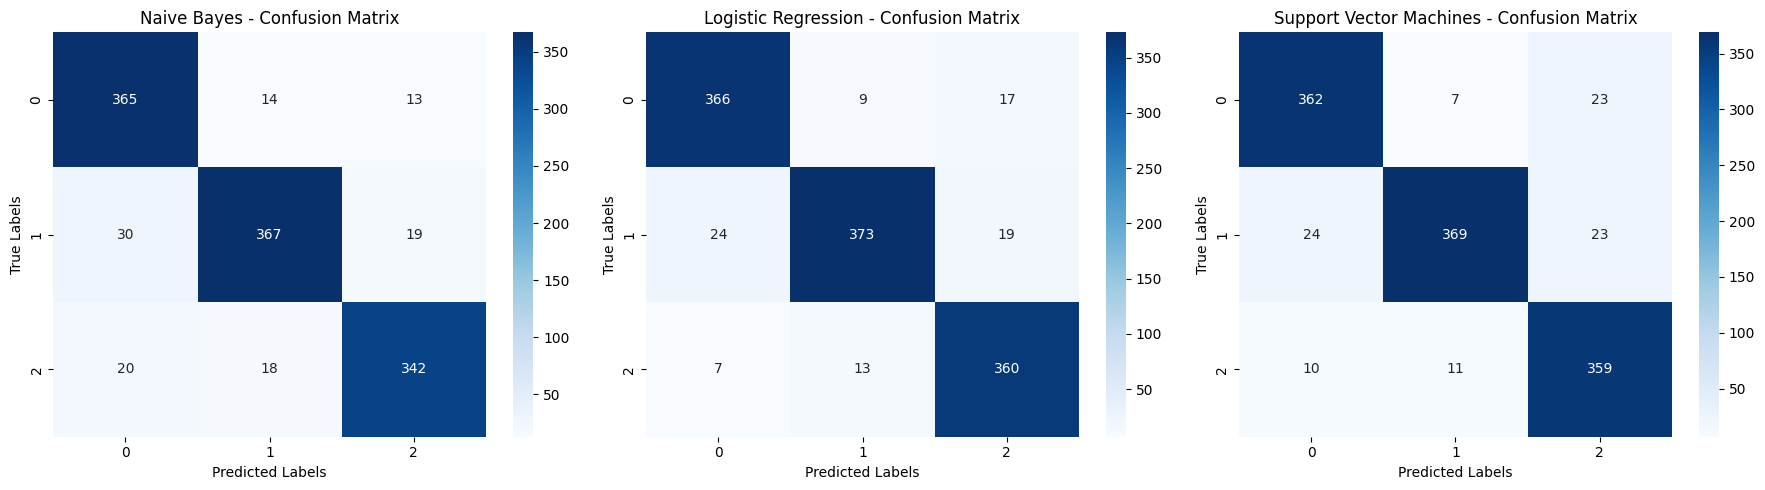

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# عرض (Confusion Matrix)
cm_nb = confusion_matrix(y_test, y_pred_nb)
cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_svm = confusion_matrix(y_test, y_pred_svm)

# طباعة Confusion Matrix مع التسميات
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Confusion Matrix for Naive Bayes
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Naive Bayes - Confusion Matrix')
axes[0].set_xlabel('Predicted Labels')
axes[0].set_ylabel('True Labels')

# Confusion Matrix for Logistic Regression
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Logistic Regression - Confusion Matrix')
axes[1].set_xlabel('Predicted Labels')
axes[1].set_ylabel('True Labels')

# Confusion Matrix for Support Vector Machines
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', ax=axes[2])
axes[2].set_title('Support Vector Machines - Confusion Matrix')
axes[2].set_xlabel('Predicted Labels')
axes[2].set_ylabel('True Labels')

plt.tight_layout()
plt.show()

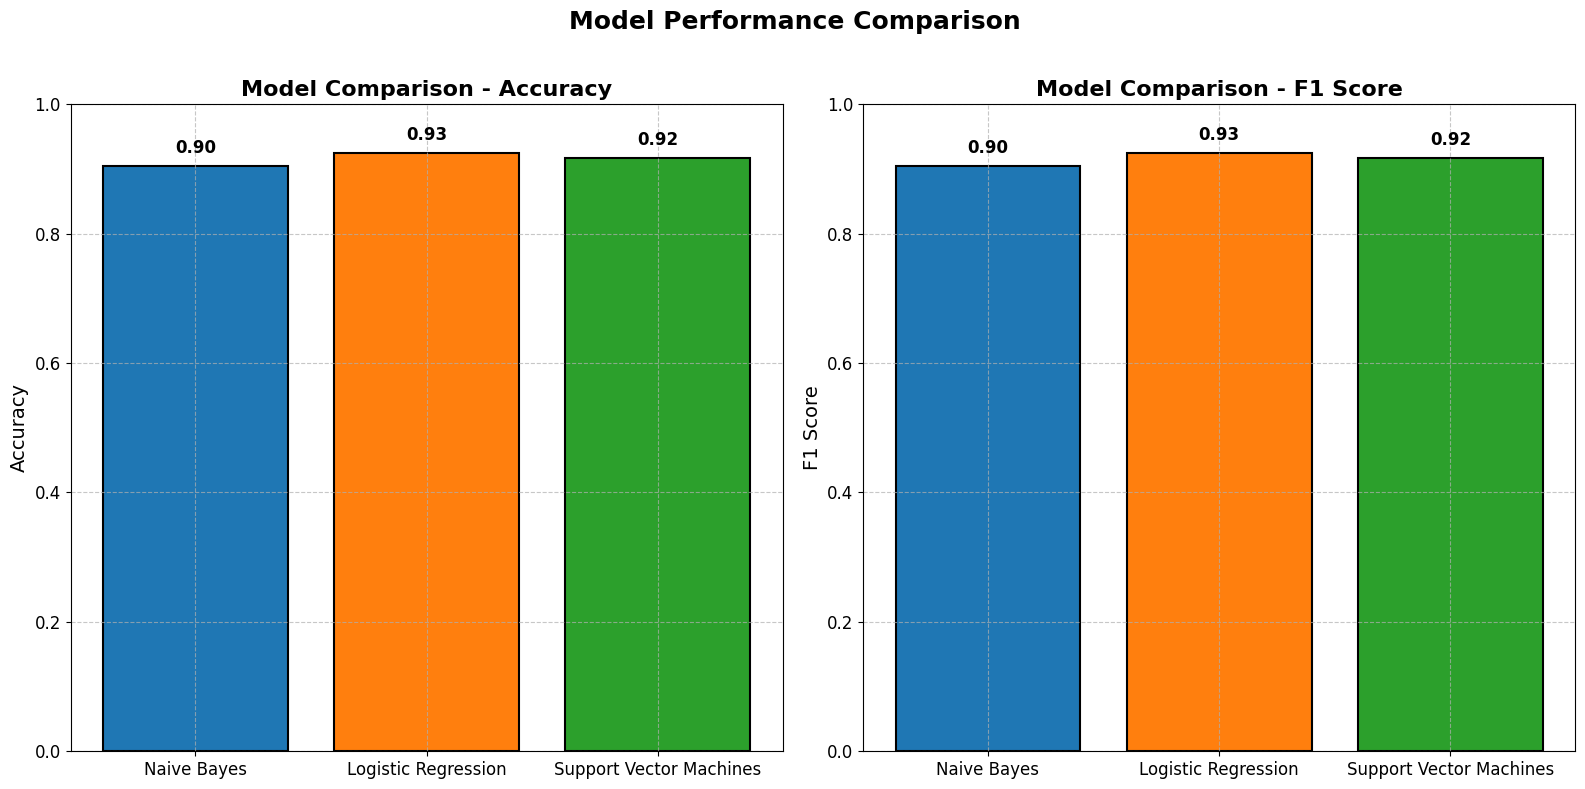

In [17]:
# عرض مقارنة بين النماذج
models = ['Naive Bayes', 'Logistic Regression', 'Support Vector Machines']
accuracies = [accuracy_nb, accuracy_lr, accuracy_svm]
f1_scores = [f1_nb, f1_lr, f1_svm]

# تحسين رسم مقارنة بين الدقة (Accuracy) والـ F1 Score
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# إعداد الألوان
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

# Accuracy Plot
ax[0].bar(models, accuracies, color=colors, edgecolor='black', linewidth=1.5)
ax[0].set_title('Model Comparison - Accuracy', fontsize=16, fontweight='bold')
ax[0].set_ylabel('Accuracy', fontsize=14)
ax[0].set_ylim(0, 1)
ax[0].tick_params(axis='x', labelsize=12)
ax[0].tick_params(axis='y', labelsize=12)
for i, v in enumerate(accuracies):
    ax[0].text(i, v + 0.02, f"{v:.2f}", ha='center', fontsize=12, fontweight='bold')

# F1 Score Plot
ax[1].bar(models, f1_scores, color=colors, edgecolor='black', linewidth=1.5)
ax[1].set_title('Model Comparison - F1 Score', fontsize=16, fontweight='bold')
ax[1].set_ylabel('F1 Score', fontsize=14)
ax[1].set_ylim(0, 1)
ax[1].tick_params(axis='x', labelsize=12)
ax[1].tick_params(axis='y', labelsize=12)
for i, v in enumerate(f1_scores):
    ax[1].text(i, v + 0.02, f"{v:.2f}", ha='center', fontsize=12, fontweight='bold')

# تحسين التخطيط العام
plt.suptitle('Model Performance Comparison', fontsize=18, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])

# إضافة خطوط الشبكة لتحسين القراءة
for axis in ax:
    axis.grid(True, linestyle='--', alpha=0.7)

plt.show()

In [18]:
# دالة التنبؤ بالنصوص الجديدة
def predict_sentiment(text):
    clean_user_text = clean_text(text)
    vectorized_user = vectorizer.transform([clean_user_text]).toarray()

    # التنبؤ باستخدام Naive Bayes
    prediction_nb = nb_model.predict(vectorized_user)
    predicted_emotion_nb = label_encoder.inverse_transform([prediction_nb])[0]
    
    # التنبؤ باستخدام Logistic Regression
    prediction_lr = lr_model.predict(vectorized_user)
    predicted_emotion_lr = label_encoder.inverse_transform([prediction_lr])[0]
    
    # التنبؤ باستخدام Support Vector Machines
    prediction_svm = svm_model.predict(vectorized_user)
    predicted_emotion_svm = label_encoder.inverse_transform([prediction_svm])[0]

    return predicted_emotion_nb, predicted_emotion_lr, predicted_emotion_svm

In [21]:
new_text = input("Enter your text to predict the emotion: ")

# التنبؤ باستخدام النماذج
predicted_emotion_nb, predicted_emotion_lr, predicted_emotion_svm = predict_sentiment(new_text)

# عرض النتائج
print(f"Predicted Emotion (Naive Bayes): {predicted_emotion_nb}")
print(f"Predicted Emotion (Logistic Regression): {predicted_emotion_lr}")
print(f"Predicted Emotion (Support Vector Machines): {predicted_emotion_svm}")

Predicted Emotion (Naive Bayes): anger
Predicted Emotion (Logistic Regression): anger
Predicted Emotion (Support Vector Machines): anger


C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22680\2929010562.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=

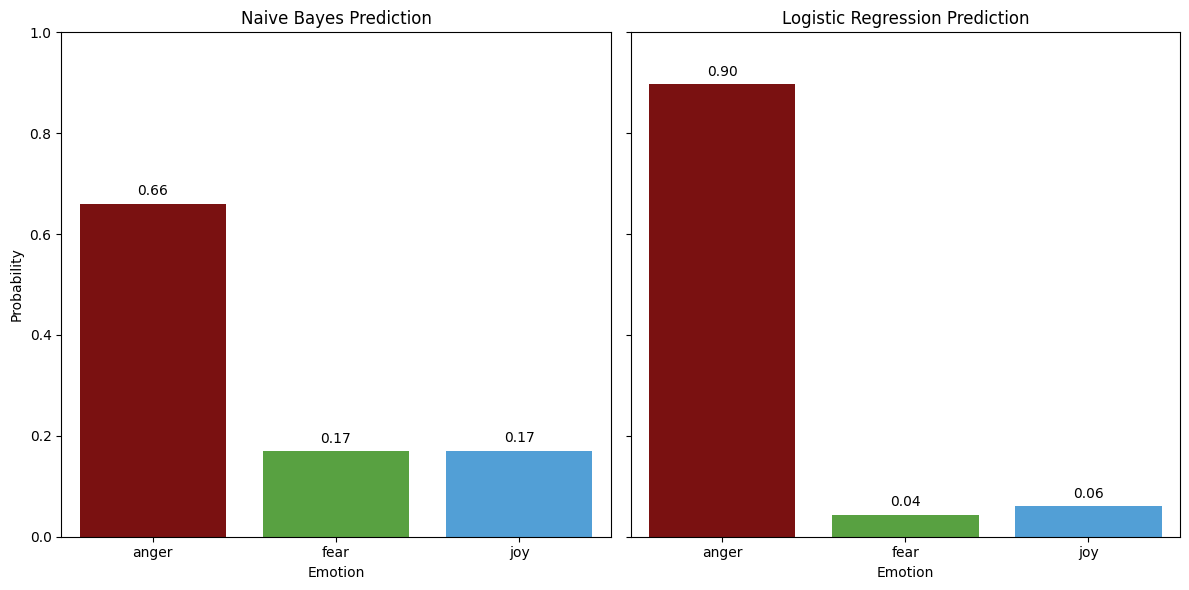

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# دالة التنبؤ بالنصوص الجديدة مع احتمالات التنبؤ
def predict_sentiment_with_probabilities(text):
    clean_user_text = clean_text(text)
    vectorized_user = vectorizer.transform([clean_user_text]).toarray()

    # التنبؤ باستخدام Naive Bayes
    probabilities_nb = nb_model.predict_proba(vectorized_user)[0]
    prediction_nb = nb_model.predict(vectorized_user)
    predicted_emotion_nb = label_encoder.inverse_transform([prediction_nb])[0]
    
    # التنبؤ باستخدام Logistic Regression
    probabilities_lr = lr_model.predict_proba(vectorized_user)[0]
    prediction_lr = lr_model.predict(vectorized_user)
    predicted_emotion_lr = label_encoder.inverse_transform([prediction_lr])[0]
    
    return (predicted_emotion_nb, probabilities_nb), (predicted_emotion_lr, probabilities_lr)

# التنبؤ باستخدام النماذج
(predicted_emotion_nb, probabilities_nb), (predicted_emotion_lr, probabilities_lr) = predict_sentiment_with_probabilities(new_text)

# عرض النتائج
models = ['Naive Bayes', 'Logistic Regression']
probabilities = [probabilities_nb, probabilities_lr]
emotions = label_encoder.classes_

# تخصيص الألوان
colors = sns.color_palette("husl", len(emotions))
anger_index = list(emotions).index('anger')
colors[anger_index] = 'darkred'

# رسم الاحتمالات
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

for i, ax in enumerate(axes):
    sns.barplot(x=emotions, y=probabilities[i], palette=colors, ax=ax)
    ax.set_title(f'{models[i]} Prediction')
    ax.set_xlabel('Emotion')
    ax.set_ylabel('Probability')
    ax.set_ylim(0, 1)
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.tight_layout()
plt.show()

In [33]:
import joblib
# حفظ النماذج
joblib.dump(lr_model, 'support_vector_model.pkl')
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")

['tfidf_vectorizer.pkl']

In [34]:
# Ensure you have the required packages installed
# You can install streamlit using the following command:

import streamlit as st
import pandas as pd

# Assuming you have a pre-trained model loaded as `model`
# and a function `predict_emotion` that takes a comment and returns the predicted emotion

def predict_emotion(comment):
    # Placeholder function: replace with your actual model prediction logic
    return "happy"

# Streamlit app
st.title("Emotion Prediction App")

st.write("This app predicts the emotion of a given comment.")

# Text input for user comment
user_comment = st.text_input("Enter a comment:")

if user_comment:
    # Predict emotion
    predicted_emotion = predict_emotion(user_comment)
    
    # Display the result
    st.write(f"The predicted emotion is: {predicted_emotion}")

# Display the dataframes if needed
if st.checkbox("Show DataFrames"):
    # Ensure df and comparison_df are defined before using them
    df = pd.DataFrame({"A": [1, 2, 3], "B": [4, 5, 6]})  # Example DataFrame
    comparison_df = pd.DataFrame({"X": [7, 8, 9], "Y": [10, 11, 12]})  # Example DataFrame
    
    st.write("DataFrame `df`:")
    st.dataframe(df)
    
    st.write("DataFrame `comparison_df`:")
    st.dataframe(comparison_df)

2025-05-02 08:34:54.447 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-02 08:34:54.527 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-02 08:34:54.885 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-02 08:34:54.886 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-02 08:34:54.902 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-02 08:34:54.958 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-02 08:34:54.958 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-02 08:34:55.010 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar